# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
## You could download it from your bucket, or you can use the file that I have in my bucket. 
## You should be able to access it from my bucket using your key and secret
## 1.Read the data CSV from s3 bucket
aws_credentials ={"key": "","secret": ""} 
df = pd.read_csv("s3://mds-s3-student96/ml_data_SYD.csv", index_col=0, parse_dates=True)
df.head(3)

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,0.001107,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,15.760960,0.000048,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,0.000102,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,0.367551,0.435086,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,0.000018,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,0.156287,9.561101,0.023083,0.253357,1.199909,1.401452


In [3]:
## 2. Drop rows with nans.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45989 entries, 1889-01-01 to 2014-12-31
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        45989 non-null  float64
 1   ACCESS-ESM1-5     45989 non-null  float64
 2   AWI-ESM-1-1-LR    45989 non-null  float64
 3   BCC-CSM2-MR       45989 non-null  float64
 4   BCC-ESM1          45989 non-null  float64
 5   CMCC-CM2-HR4      45989 non-null  float64
 6   CMCC-CM2-SR5      45989 non-null  float64
 7   CMCC-ESM2         45989 non-null  float64
 8   CanESM5           45989 non-null  float64
 9   EC-Earth3-Veg-LR  45989 non-null  float64
 10  FGOALS-g3         45989 non-null  float64
 11  GFDL-CM4          45989 non-null  float64
 12  INM-CM4-8         45989 non-null  float64
 13  INM-CM5-0         45989 non-null  float64
 14  KIOST-ESM         45989 non-null  float64
 15  MIROC6            45989 non-null  float64
 16  MPI-ESM-1-2-HAM   45989

In [4]:
## 3.Split the data into train (80%) and test (20%) portions with random_state=123.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [5]:
## 4.Carry out EDA of your choice on the train split. 
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


In [6]:
#!pip install seaborn

<AxesSubplot:>

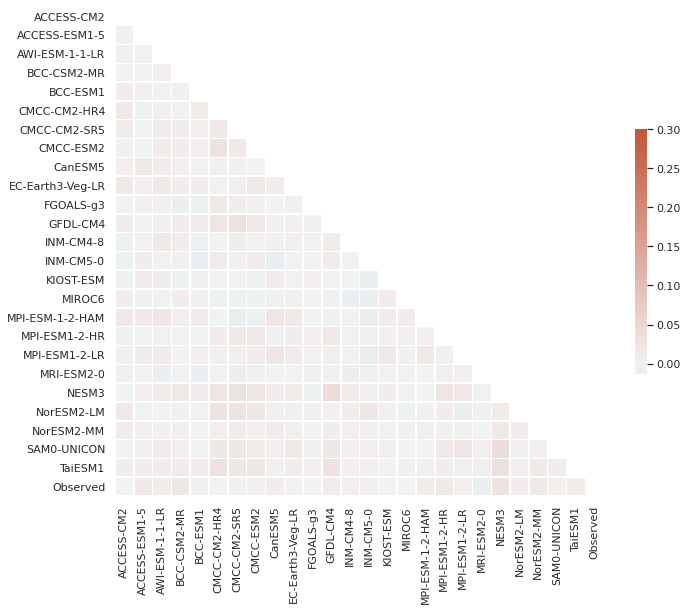

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
X_train = train_df.drop(columns=["Observed"])
y_train = train_df["Observed"]

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36791 entries, 1953-10-26 to 1932-01-31
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        36791 non-null  float64
 1   ACCESS-ESM1-5     36791 non-null  float64
 2   AWI-ESM-1-1-LR    36791 non-null  float64
 3   BCC-CSM2-MR       36791 non-null  float64
 4   BCC-ESM1          36791 non-null  float64
 5   CMCC-CM2-HR4      36791 non-null  float64
 6   CMCC-CM2-SR5      36791 non-null  float64
 7   CMCC-ESM2         36791 non-null  float64
 8   CanESM5           36791 non-null  float64
 9   EC-Earth3-Veg-LR  36791 non-null  float64
 10  FGOALS-g3         36791 non-null  float64
 11  GFDL-CM4          36791 non-null  float64
 12  INM-CM4-8         36791 non-null  float64
 13  INM-CM5-0         36791 non-null  float64
 14  KIOST-ESM         36791 non-null  float64
 15  MIROC6            36791 non-null  float64
 16  MPI-ESM-1-2-HAM   36791

In [10]:
X_test = test_df.drop(columns=["Observed"])
y_test = test_df["Observed"]

### Please see Question 5 & 6 in Part 2

## Part 2:

### Preparation for deploying model next week

#### Complete task 4 from the milestone3 before coming here

We’ve found ```n_estimators=100, max_depth=5``` to be the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [11]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=False)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5)

In [12]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.91
 Test RMSE: 8.72


In [13]:
result_df = pd.DataFrame(index=df.columns[:-1], columns=["RMSE"])
for model in result_df.index: 
    result_df.loc[model] = mean_squared_error(df['Observed'], df[model], squared=False)

result_df

,RMSE
ACCESS-CM2,10.6633
ACCESS-ESM1-5,10.6539
AWI-ESM-1-1-LR,10.901
BCC-CSM2-MR,10.3898
BCC-ESM1,10.1824
CMCC-CM2-HR4,10.412
CMCC-CM2-SR5,11.0467
CMCC-ESM2,10.822
CanESM5,10.6898
EC-Earth3-Veg-LR,10.0149


**Result Obserevation**

> The individual climate models have RMSE ranging from 9-12 which is higher than the test RMSE of our ensemble model with RMSE of 8.72. We do obtain a better result with the ensemble model with hyperparameter tuned. 

In [14]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3. You choose how you want to upload it.***

In [15]:
import boto3, os

s3 = boto3.resource('s3')

In [17]:
s3.meta.client.upload_file('model.joblib', 'mds-s3-student5', 'output/model.joblib')